In [1]:
import numpy as np
from matplotlib import pyplot as plt 

Original formula given by M/s Alsthom

In [2]:
a_alt = 3689.3
b_alt = 35.204
c_alt = 0.655

Change to meter/sec

In [3]:
a_sim_4 = 3689.3 
b_sim_4 = 35.204 * 3.6
c_sim_4 = 0.655 * 3.6 * 3.6

Siemens algorithm for changing from 4 car to 6 car

In [4]:
a_sim_6 = a_sim_4 * 6 / 4
b_sim_6 = b_sim_4 * 6 / 4
c_sim_6 = c_sim_4 * 6 / 4

Display the coefficients

In [5]:
print('Siemens Davis Coefficient for 4 cars: a = {}, b = {}, c = {}'.format(round(a_sim_4,2), \
                                                                      round(b_sim_4,2), round(c_sim_4,2)))
print('Siemens Davis Coefficient for 6 cars: a = {}, b = {}, c = {}'.format(round(a_sim_6,2), \
                                                                      round(b_sim_6,2), round(c_sim_6,2)))

Siemens Davis Coefficient for 4 cars: a = 3689.3, b = 126.73, c = 8.49
Siemens Davis Coefficient for 6 cars: a = 5533.95, b = 190.1, c = 12.73


Get the x-axis matrix i.e speed from 1 to 80 km/h
Similar matrix for m/sec

In [6]:
v = np.arange(1,80,dtype=float)
v_m_s = np.arange(1,80,dtype=float) * 1000/3600
#print(v) 
#print(v_m_s) 

Get the y-axis matrix for both km/h and m/s

In [7]:
f_train_alt = a_alt + b_alt*v + c_alt*v**2
f_train_sim_4 = a_sim_4 + b_sim_4*v_m_s + c_sim_4*v_m_s**2
f_train_sim_6 = a_sim_6 + b_sim_6*v_m_s + c_sim_6*v_m_s**2

Plot the 2 graph 

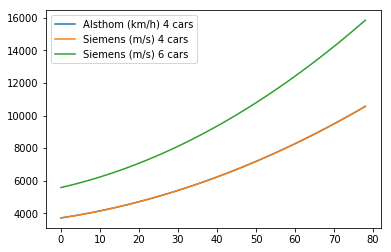

In [8]:
plt.plot(f_train_alt,label = 'Alsthom (km/h) 4 cars')
plt.plot(f_train_sim_4,label = 'Siemens (m/s) 4 cars')
plt.plot(f_train_sim_6,label = 'Siemens (m/s) 6 cars')
plt.legend()

Siemens used values of coefficient

In [9]:
a_sim = 5534
b_sim = 190.1
c_sim = 12.7 

Alsthom revised formula coefficients

In [10]:
Car_no = 6
Car_mass = 57
Axels_no = 4 * Car_no
a_revised = 6.4 * Car_mass * Car_no + 130 * Axels_no 
b_revised = 0.14 * Car_mass * Car_no
c_revised = (0.046 + 0.0065 * (Car_no - 1)) * 10

In [11]:
print('a = {}, b = {}, c = {}'.format(a_revised, b_revised, c_revised))

a = 5308.8, b = 47.88, c = 0.785


In [12]:
#print(v) 

In [13]:
f_train_sim = a_sim + b_sim*v_m_s + c_sim*v_m_s**2
f_revised = a_revised + b_revised*v + c_revised*v**2

In [14]:
#print(f_train)

Plot all three equations

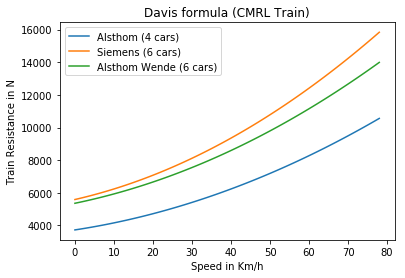

In [15]:
plt.plot(f_train_alt,label = 'Alsthom (4 cars)')
plt.plot(f_train_sim_6, label = 'Siemens (6 cars)')
plt.plot(f_revised, label = 'Alsthom Wende (6 cars)')
plt.xlabel("Speed in Km/h")
plt.ylabel("Train Resistance in N")
plt.title("Davis formula (CMRL Train)")
plt.legend()